<a href="https://colab.research.google.com/github/pranjalsinha1205/MagicGammaTelescope/blob/main/MagicGammaTelescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv("/content/magic04.data")
df.head()

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [3]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df.columns = cols
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [4]:
df['class'] = (df['class']=='g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,1
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,1
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,1
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,1
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,1


Classification means predicting discrete classes

It is of 2 types:-

i) Binary classification (yes or no/ positive or negative)

ii) Multiclass classification (pizza, burger, noodles, etc)

Regression means predicting continuous values, e.g., price of ethereum, temperature, etc.

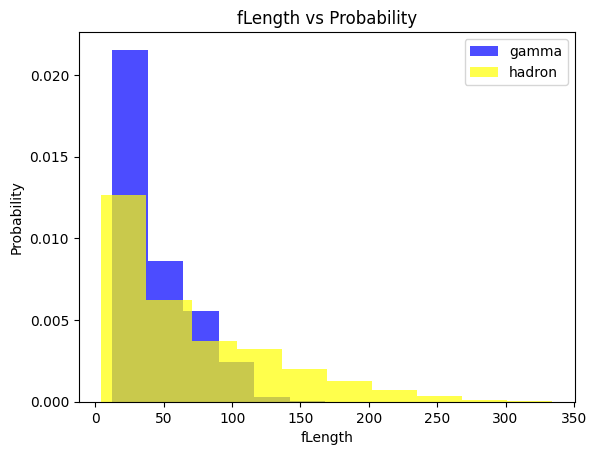

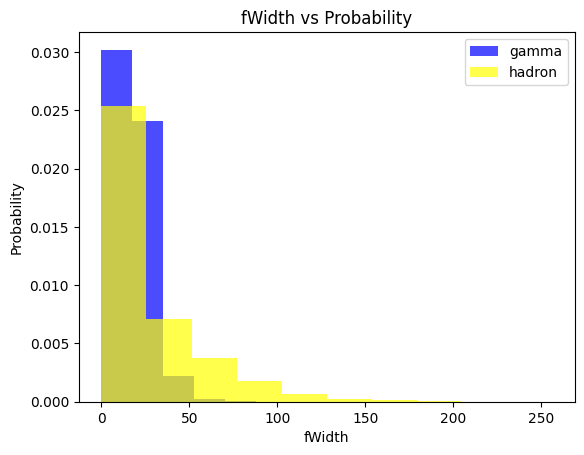

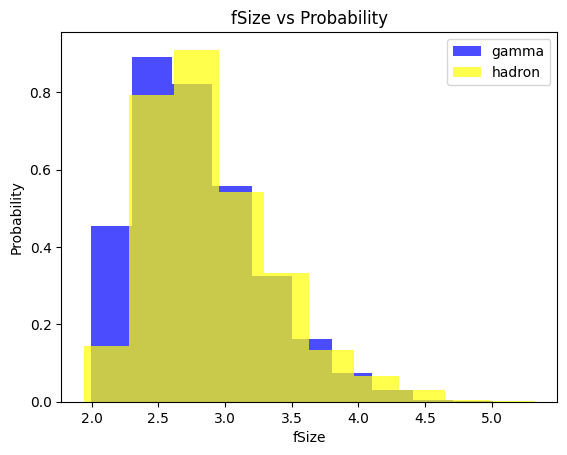

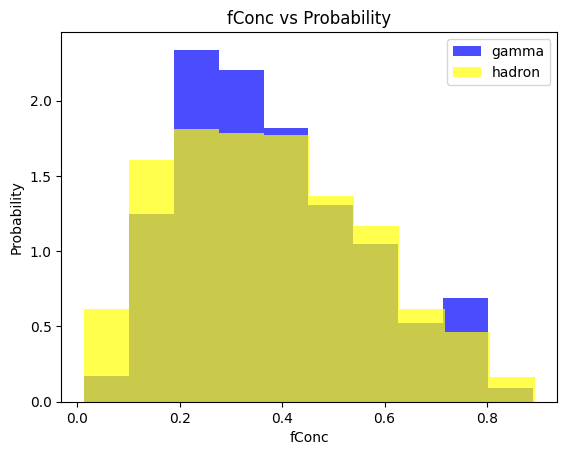

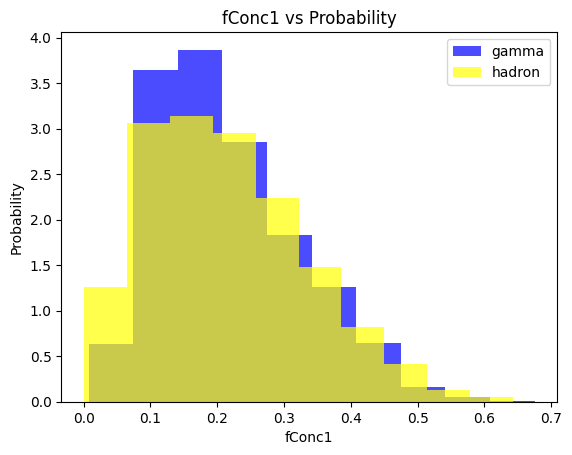

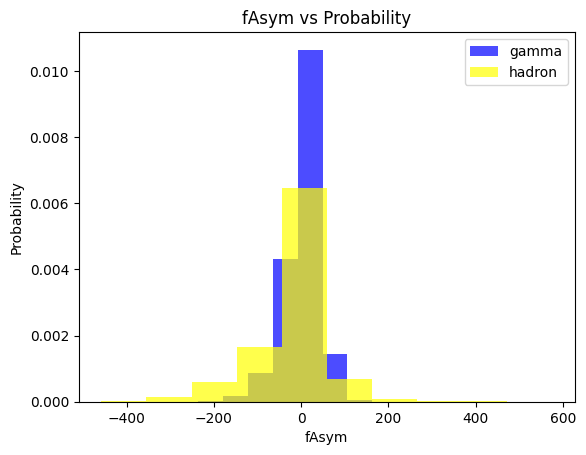

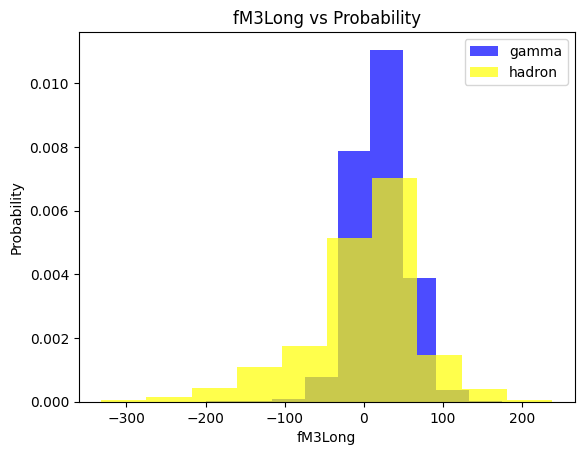

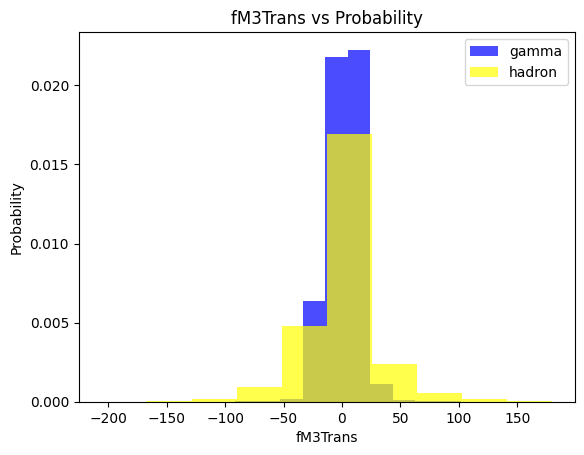

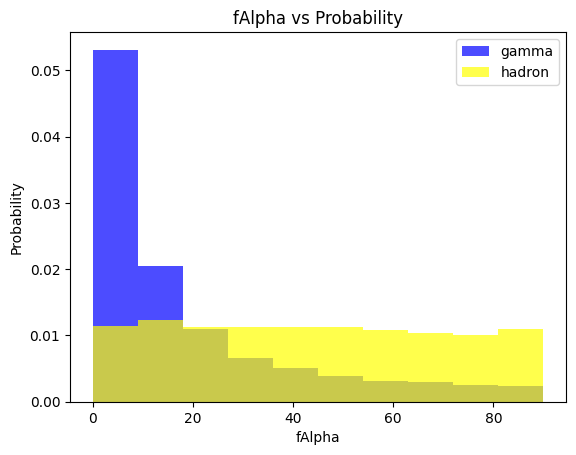

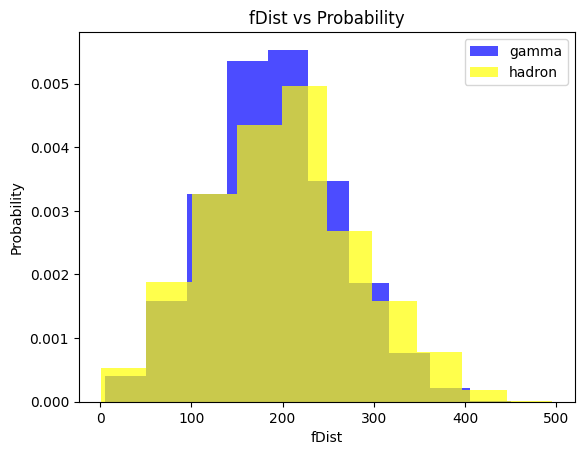

In [5]:
for i in cols[:-1]:
  plt.hist(df[df['class']==1][i], color='blue', label='gamma', alpha=.7, density=True)
  plt.hist(df[df['class']==0][i], color='yellow', label='hadron', alpha=.7, density=True)
  plt.title(f"{i} vs Probability")
  plt.xlabel(i)
  plt.ylabel("Probability")
  plt.legend()
  plt.show()
  print()

# Train, Test, Validation datasets

In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [7]:
def scale_dataset(df, oversample=False):
  X = df[df.columns[:-1]].values
  y = df[df.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [8]:
df['class'].value_counts()

class
1    12331
0     6688
Name: count, dtype: int64

In [9]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [10]:
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [11]:
print(sum(y_train==0))
print(sum(y_train==1))

7404
7404


# kNN (K-Nearest Neighbour)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
# for importing the kNN classifier

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
from sklearn.metrics import classification_report

In [15]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.67      0.72      1372
           1       0.83      0.90      0.86      2432

    accuracy                           0.82      3804
   macro avg       0.81      0.78      0.79      3804
weighted avg       0.81      0.82      0.81      3804



# Naive Bayes

P(B|A) = P(A|B) * P(B) / P(A)

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [20]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.39      0.50      1372
           1       0.72      0.89      0.80      2432

    accuracy                           0.71      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.71      0.69      3804



# Logistic Regression

the equation for line of regression is, y^ = mx + b

here, y can be replaced by odds

=> p/(1-p) = mx + b

but there is a problem with this equation, it's that the odds might take negative values, therefore to tackle this situation we take natural log for the odds.

=> ln(p/(1-p)) = mx + b

=> p/(1-p) = e^(mx + b)

=> p = e^(mx + b) -p*e^(mx + b)

=> p(1 + e^(mx + b)) = e^(mx + b)

=> p = e^(mx + b)/(1 + e^(mx + b))

=> p = 1/(1 + e^-((mx + b)))

This is a form of a special function called ***sigmoid***

S(y) = 1/(1 + e^-y)

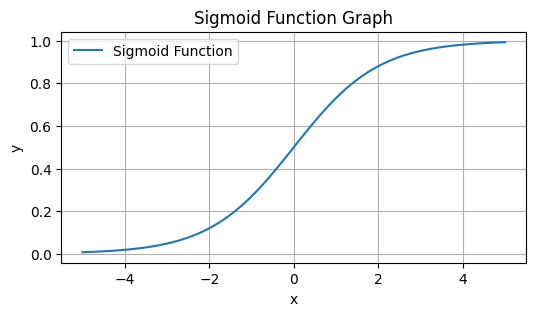

# Code for drawing the graph

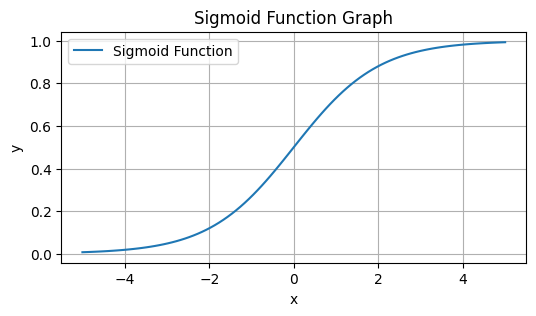

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
  """
  Sigmoid function, also known as logistic function.
  """
  return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 100)  # Range of x-values
y = sigmoid(x)
plt.figure(figsize=(6,3))
plt.plot(x, y, label='Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid Function Graph')
plt.grid(True)
plt.legend()
plt.show()

When we have only one data point, we call this ***Simple Logistic Regression***, but when we have multiple, we call it ***Multiple Logistic Regression***

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log_model = LogisticRegression()

In [27]:
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1372
           1       0.84      0.82      0.83      2432

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# Support Vector Machines (SVM)

In this, we try to draw a line that will divide the two types of classifications, just so that only one type of class is at each side of the line or plane in case of 3D.

In making the line, we have to make sure that we have to choose the line which divides the two classes most uniformly, that which is unbiased, therefore we have to choose the one which has the most margin.

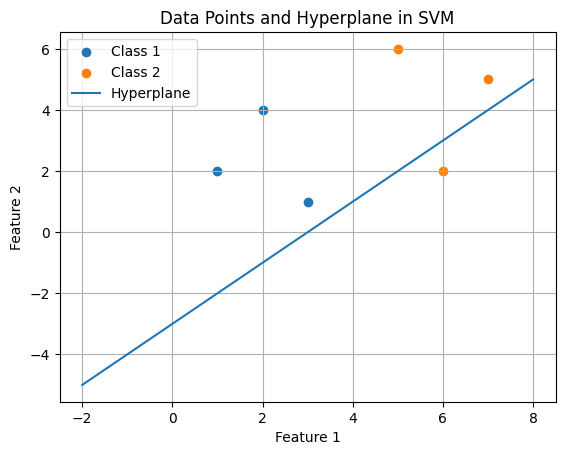

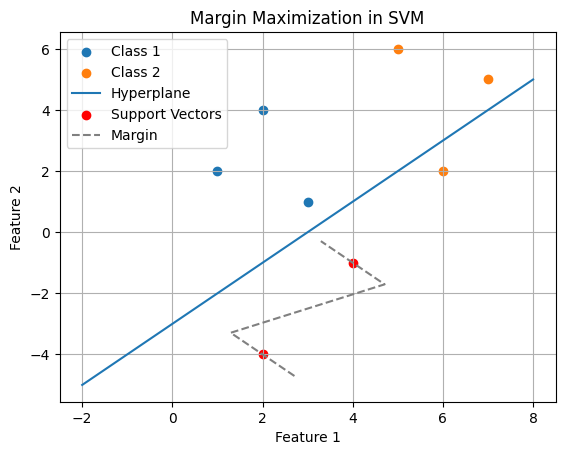

# Code for drawing the graph

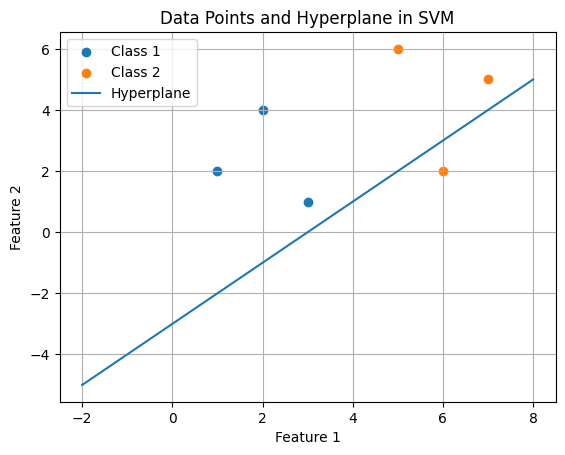

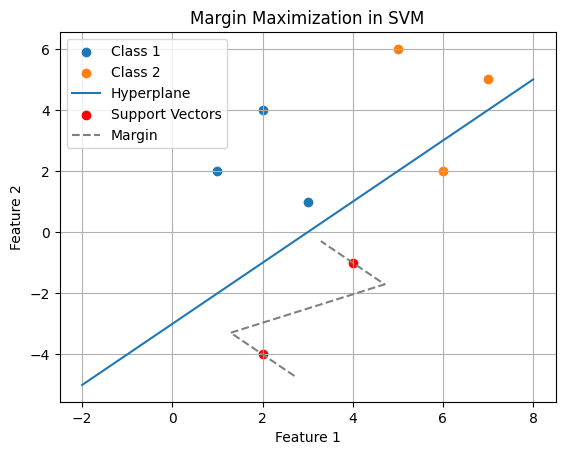

In [28]:
import matplotlib.pyplot as plt
import numpy as np


# Sample data points
data_class_1 = np.array([[1, 2], [3, 1], [2, 4]])
data_class_2 = np.array([[5, 6], [7, 5], [6, 2]])

# Support vectors for each class
support_vectors_class_1 = np.array([[2, 3], [1, 1]])
support_vectors_class_2 = np.array([[4, 2], [5, 4]])

# Define a hyperplane (w = [1, -1], b = -3) for illustration purposes
w = np.array([1, -1])
b = -3

def plot_data_and_hyperplane():
  plt.scatter(data_class_1[:, 0], data_class_1[:, 1], label='Class 1')
  plt.scatter(data_class_2[:, 0], data_class_2[:, 1], label='Class 2')

  # Plot the hyperplane
  x_values = np.linspace(-2, 8, 100)
  y_values = -(w[0] * x_values + b) / w[1]
  plt.plot(x_values, y_values, label='Hyperplane')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Data Points and Hyperplane in SVM')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_margin_maximization():
  plt.scatter(data_class_1[:, 0], data_class_1[:, 1], label='Class 1')
  plt.scatter(data_class_2[:, 0], data_class_2[:, 1], label='Class 2')

  # Project support vectors onto the hyperplane for visualization
  projected_support_vector_1 = np.dot(w, support_vectors_class_1[0]) + b
  projected_support_vector_2 = np.dot(w, support_vectors_class_2[0]) + b
  projected_support_vectors = np.array([(support_vectors_class_1[0][0], projected_support_vector_1),
                                       (support_vectors_class_2[0][0], projected_support_vector_2)])

  # Plot the hyperplane (same as above)
  x_values = np.linspace(-2, 8, 100)
  y_values = -(w[0] * x_values + b) / w[1]
  plt.plot(x_values, y_values, label='Hyperplane')

  # Highlight support vectors and margin lines (perpendicular to hyperplane)
  plt.scatter(projected_support_vectors[:, 0], projected_support_vectors[:, 1], marker='o', c='red', label='Support Vectors')

  margin_vector = w / np.linalg.norm(w)  # Unit vector in the direction of w
  margin_lines = np.array([projected_support_vectors[0] + margin_vector,
                           projected_support_vectors[0] - margin_vector,
                           projected_support_vectors[1] + margin_vector,
                           projected_support_vectors[1] - margin_vector])
  plt.plot(margin_lines[:, 0], margin_lines[:, 1], linestyle='--', color='gray', label='Margin')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Margin Maximization in SVM')
  plt.legend()
  plt.grid(True)
  plt.show()

# Plot the first graph (data points and hyperplane)
plot_data_and_hyperplane()

# Plot the second graph (margin maximization)
plot_margin_maximization()

When we have a 1D dataset where we have difficulty in using SVM, we just square the numbers, and then find the line, this is called the kernel trick:->

***x*** -> ****(x******2***, x)***

In [29]:
from sklearn.svm import SVC #support vector classifier

In [30]:
svm_model = SVC()

In [32]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1372
           1       0.87      0.90      0.89      2432

    accuracy                           0.85      3804
   macro avg       0.84      0.83      0.84      3804
weighted avg       0.85      0.85      0.85      3804

